In [2]:
import numpy as np
import numpy.linalg as npl # 선형 대수학
import matplotlib.pyplot as plt
import PIL
from PIL import Image

In [3]:
plt.rcParams["figure.figsize"] = (10,10)
origin2D = np.array([0,0])
origin3D = np.array([0,0,0])
scale=10

In [6]:
print(np.array([1,0]))
print(np.hstack([1,0])) # row vector, horizontal
print(np.vstack([1,0])) # column Vector, Vertical

[1 0]
[1 0]
[[1]
 [0]]


## 4.1.1 Determinant : 면적(2D)/부피 (3D이상 측정 도구)

### 1) The area of parallelogram spanned by vectors b ** and ** g is def | (b,g)|



In [7]:
g = np.vstack([1,0])
b = np.vstack([0,1])

A = np.hstack([g,b]) # g와 b로 이루저진 Matrix
print("A")
print (A, "\n")

print("det(A)")
print(npl.det(A)) # span되는 면적

A
[[1 0]
 [0 1]] 

det(A)
1.0


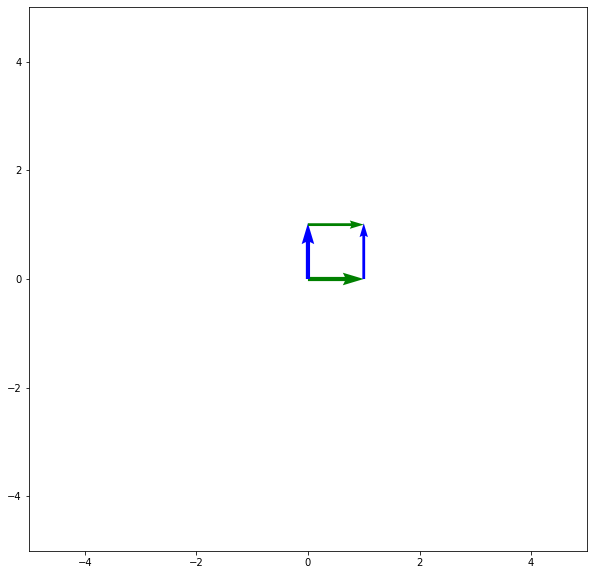

In [21]:

plt.axis([-scale/2, scale/2, -scale/2, scale/2 ]) # plt 생성 
# X 맨 왼쪽, X 맨 오른쪽, Y 맨 아래, Y 맨 위
plt.quiver(origin2D[0], origin2D[1], g[0], g[1], scale = scale, color="g") # start point 부터 end point 까지 vector를 그림
plt.quiver(origin2D[0], origin2D[1], b[0], b[1], scale = scale, color="b") # start point 부터 end point 까지 vector를 그림
plt.quiver(g[0], g[1], b[0],b[1], scale = scale, width = 0.005, color="b")
plt.quiver(b[0], b[1], g[0],g[1], scale = scale, width = 0.005, color="g")

plt.show()

### 2) The volume of the paralelleplped sppaned by the vector r,g,b is def|r,g,b|

In [24]:
r = np.vstack([2,0,-6])
g = np.vstack([6,1,0])
b = np.vstack([1,4,-1])
A = np.hstack([r,g,b])
print(A)
print(npl.det(A))

[[ 2  6  1]
 [ 0  1  4]
 [-6  0 -1]]
-139.99999999999994


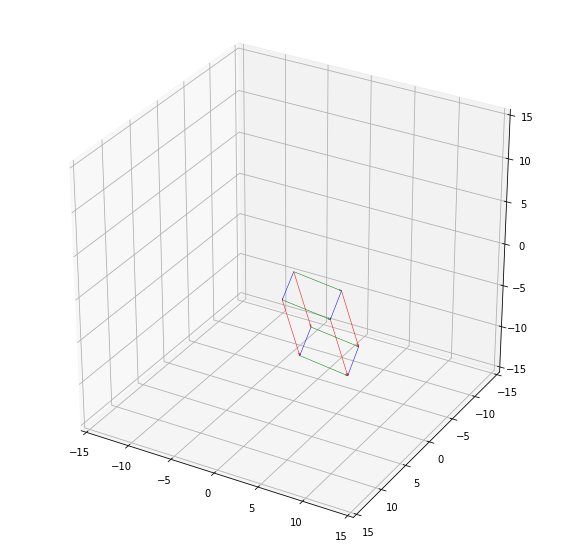

In [29]:
from mpl_toolkits import mplot3d

# figure setup
fig = plt.figure()
ax =plt.axes(projection ="3d")
scale3D=15

ax.set_xlim3d(-scale3D,scale3D)
ax.set_ylim3d(scale3D,-scale3D)
ax.set_zlim3d(-scale3D,scale3D)

# determinant 그리기

ax.quiver(origin3D[0], origin3D[1],origin3D[2], A[0,0], A[1,0], A[2,0], color="r", linewidths=.5, arrow_length_ratio=.05)
ax.quiver(origin3D[0], origin3D[1],origin3D[2], A[0,1], A[1,1], A[2,1], color="g", linewidths=.5, arrow_length_ratio=.05)
ax.quiver(origin3D[0], origin3D[1],origin3D[2], A[0,2], A[1,2], A[2,2], color="b", linewidths=.5, arrow_length_ratio=.05)
import itertools as it
quiverkey = dict(linewidths =.5, arrow_length_ratio=.05, label="_nolegend_")
c = ["r","g","b"]
# 엣지 그리기 반복

for i in [i for i in list(it.product([0,1,2], repeat=2)) if i[0] != i[1]]:
    ax.quiver(A[0,i[0]], A[1,i[0]], A[2,i[0]],
             A[0,i[1]], A[1,i[1]], A[2,i[1]],
             color = c[i[1]], **quiverkey)
ax.quiver(A[0,1] + A[0,2], A[1,1] +A[1,2], A[2,1] + A[2,2],
         A[0,0], A[1,0], A[2,0],
         color="r", **quiverkey)
ax.quiver(A[0,2] + A[0,0], A[1,2] +A[1,0], A[2,2] + A[2,0],
         A[0,1], A[1,1], A[2,1],
         color="g", **quiverkey)
ax.quiver(A[0,0] + A[0,1], A[1,0] +A[1,1], A[2,0] + A[2,1],
         A[0,2], A[1,2], A[2,2],
         color="b", **quiverkey)

plt.show()

### 4.1.3 Trace

In [32]:
A = np.array([[3,4,-8],
            [1,3,7],
            [6,-11,2]])
print("A: ")
print(A, "\n")

print("Trace(A) : ")
print(np.trace(A))

A: 
[[  3   4  -8]
 [  1   3   7]
 [  6 -11   2]] 

Trace(A) : 
8


In [36]:
x = np.vstack([3,-1])
y = np.vstack([8,5])

print("tr(xy^t) : ")
yt = np.transpose(y)
print(np.trace(x.dot(yt))) # outer product

print("x^Ty : ")
xt = np.transpose(x)
print(xt.dot(y)) # inner product

# outer product의 trace와 inner product의 값이 같은지 확인하는 코드

tr(xy^t) : 
19
x^Ty : 
[[19]]


## 4.2 Cholesky decompositon

In [41]:
A = np.vstack([[3,2,2], [2,3,2], [2,2,3]])
print("A : ")
print(A)

print("Cholesky(A) : L")
print(npl.cholesky(A))

print("L^T")
print(np.transpose(npl.cholesky(A)))

A : 
[[3 2 2]
 [2 3 2]
 [2 2 3]]
Cholesky(A) : L
[[1.73205081 0.         0.        ]
 [1.15470054 1.29099445 0.        ]
 [1.15470054 0.51639778 1.18321596]]
L^T
[[1.73205081 1.15470054 1.15470054]
 [0.         1.29099445 0.51639778]
 [0.         0.         1.18321596]]


## 4.3 Eigendecomposition

In [47]:
A = np.vstack([[4,2], [1,3]])
print("A : ")
print(A, "\n")

e_values, e_vectors = npl.eig(A)
print(e_values)
print(e_vectors)

# eigen vector u1, u2
u1 = np.vstack(e_vectors[:,0]) # 모든 row에서 첫번째 column
u2 = np.vstack(e_vectors[:,1]) # 모든 row에서 첫번째 column
print("u1 : ", u1)
print("u2 : ", u2)

# eigen value lambda1, lambda2
l1,l2 = e_values
print("eigen values :", l1,l2, "\n")

# check
print("Au1:", np.dot(A,u1))
print("l1*u1 : ", l1,*u1)

print("Au2 : ", np.dot(A, u2))
print("l2*u2 ", l2*u2)

A : 
[[4 2]
 [1 3]] 

[5. 2.]
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]
u1 :  [[0.89442719]
 [0.4472136 ]]
u2 :  [[-0.70710678]
 [ 0.70710678]]
eigen values : 5.0 2.0 

Au1: [[4.47213595]
 [2.23606798]]
l1*u1 :  5.0 [0.89442719] [0.4472136]
Au2 :  [[-1.41421356]
 [ 1.41421356]]
l2*u2  [[-1.41421356]
 [ 1.41421356]]


## 4.4 Singular value decompositon (SVD)

Square Matrix가 아닐 때 decomposition 하는 방법

A = U 시그마 V^T  

U는 M x M, 시그마는 M x N  V^T는 N x N (M < N)+

### 1) Stonhenge 이미지 파악

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=960x635 at 0x2185258ADA0>
PNG
(960, 635)
RGBA


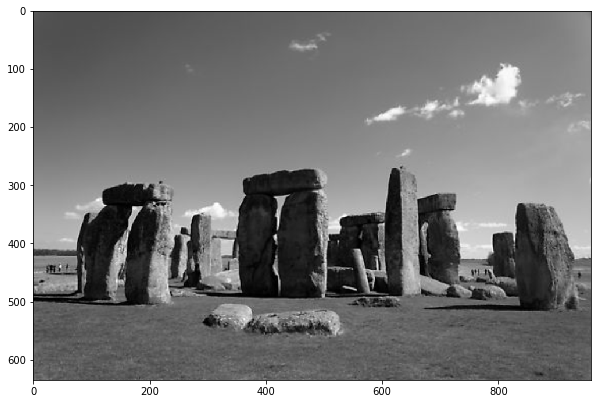

In [49]:
stonehenge = Image.open('stonehenge.png')
print(stonehenge)
print(stonehenge.format) # png
print(stonehenge.size) # witdh, height
print(stonehenge.mode) # RGBA 모드, png는 하나 더 붙음 A는 투명도

plt.imshow(stonehenge)
plt.show()

### 2) 픽셀 값 0~1 사이로 만들기

RGB를 GreyScale로 만듬

In [51]:
imMatrix = np.array(stonehenge.convert("L"))/255.0 # 정규화 작업
print(imMatrix.shape)
print(imMatrix)

(635, 960)
[[0.35294118 0.34509804 0.3372549  ... 0.48627451 0.46666667 0.48627451]
 [0.32156863 0.32941176 0.31372549 ... 0.47843137 0.45098039 0.4627451 ]
 [0.34117647 0.37647059 0.34117647 ... 0.49019608 0.47058824 0.47058824]
 ...
 [0.41568627 0.41568627 0.41960784 ... 0.39215686 0.39215686 0.4       ]
 [0.42352941 0.43137255 0.42745098 ... 0.38431373 0.39607843 0.4       ]
 [0.43137255 0.45098039 0.42745098 ... 0.37254902 0.39607843 0.39607843]]


## 3) SVD 실행

In [61]:
scalar =1/2 
shape = np.shape(imMatrix) # (h,w)
U,S,V = npl.svd(imMatrix) # numpy liear algebra svd 구글링해보기
# S는 대각성분의 값만 나옴. 즉 행렬 아님
Sd = np.hstack([np.eye(shape[0])*S.copy(), np.zeros((shape[0], shape[1]-shape[0]))]) # 행렬로 만들어주는 작업
# shape[0] = height, shape[1] = w 즉 h + w-h가 되어 가로는 w가 된다.
print(np.shape(U), np.shape(Sd), np.shape(V))

(635, 635) (635, 960) (960, 960)


True


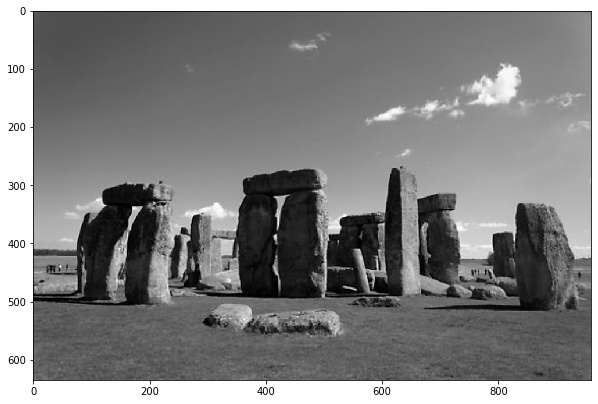

In [70]:
# --- Image reconstruction with the SVD ----
# check 1. 원본 영상 vs U x Sd x V

usv = U @ Sd @ V # matrix 곱, 3.5 이하는 np,matmul을 사용해야함
print(np.allclose(imMatrix, usv)) # i둘이 같은지 비교함. 같으면 True

plt.imshow(usv, cmap='gray')
plt.show()

(635, 1)
(1, 1)
(1, 960)
2 [(635, 960), (635, 635), (635, 960), (960, 960)]
1596 609600 0.0026181102362204723


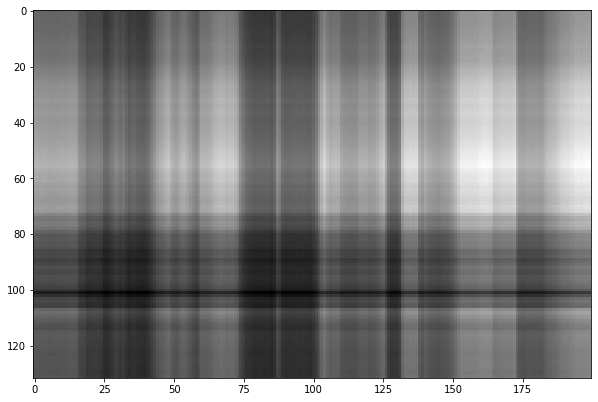

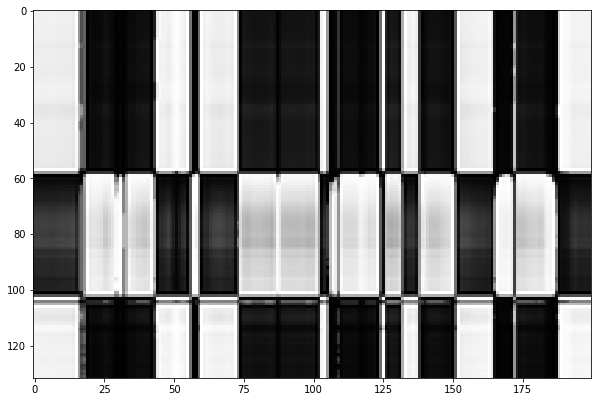

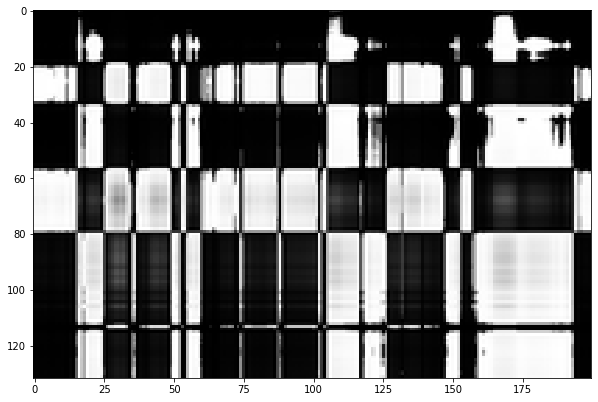

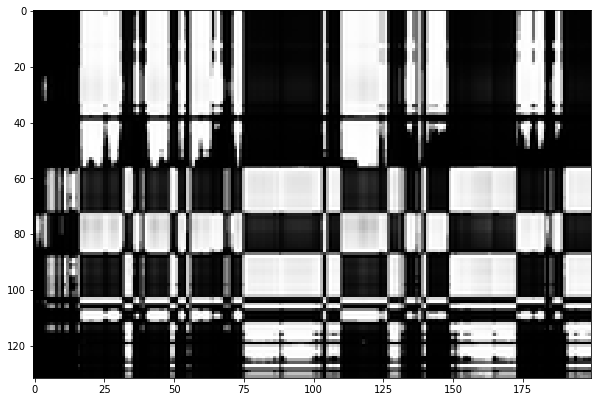

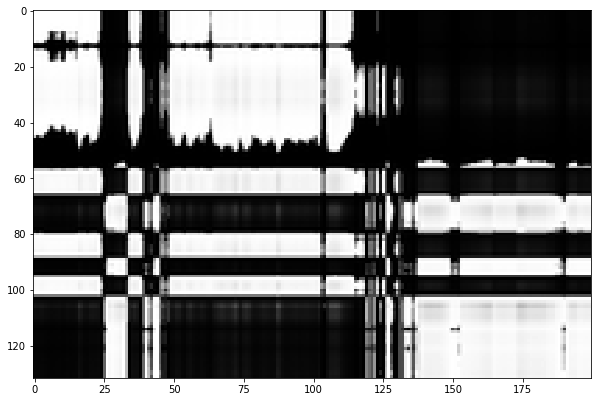

In [82]:
# 4) Ai 시각화

k=1
print(np.shape(U[:,:k]))
print(np.shape(np.diag(S[:k])))
print(np.shape(V.T[:,:k].T))

m,n = np.shape(imMatrix)
partial, total = k*(m+n) + k, m*n
print(np.ndim(imMatrix), [np.shape(i) for i in [imMatrix, U, Sd, V]])
print(partial, total, partial/total)

size =(200,200)
imtemp = lambda k :(np.vstack(U[:,k-1])@np.vstack([S[k-1]])@np.vstack(V[k-1]).T)*255

for i in list(range(1,6)):
    im = Image.fromarray(imtemp(i).astype('uint8'))
    im.thumbnail(size, Image.ANTIALIAS)
    plt.imshow(im, cmap='gray')
    plt.show()

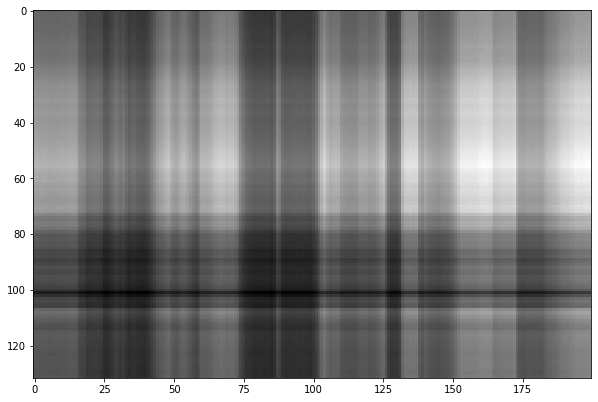

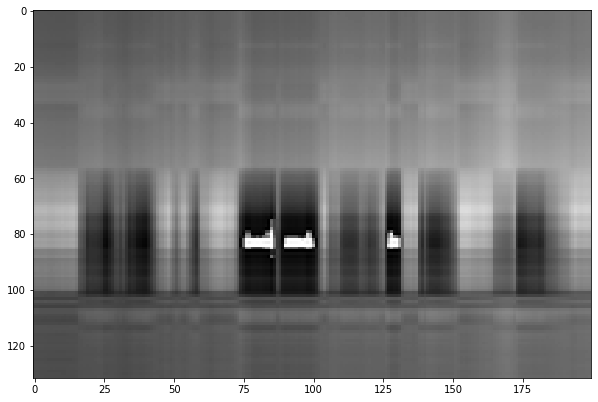

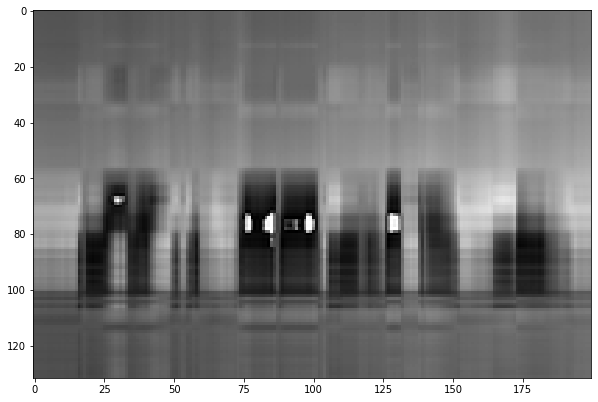

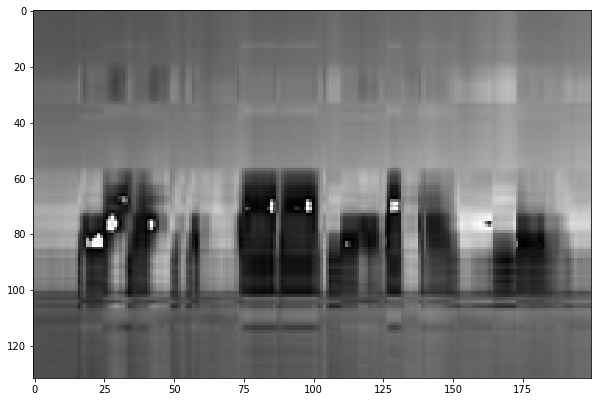

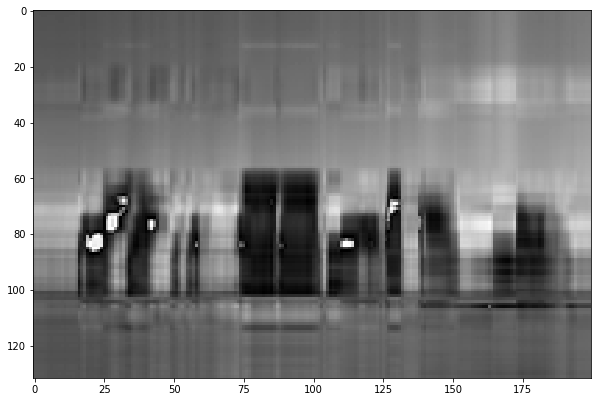

In [84]:
# 5) A^(i) 시각화

quality = 5
np.shape(np.diag(S[:quality]))
np.shape(U[:, :quality])
np.shape(V[:quality,:])
k=quality
m,n = np.shape(imMatrix)
partial, total = k*(m+n)+k, m*n
np.ndim(imMatrix), [np.shape(i) for i in [imMatrix,U,Sd,V]]

imtemp = lambda k : (U[:, :k]@np.diag(S[:k])@V.T[:,:k].T)*255
for i in list(range(1, k+1)):
    im = Image.fromarray(imtemp(i).astype('uint8'))
    im.thumbnail(size, Image.ANTIALIAS)
    plt.imshow(im, cmap='gray')
    plt.show()

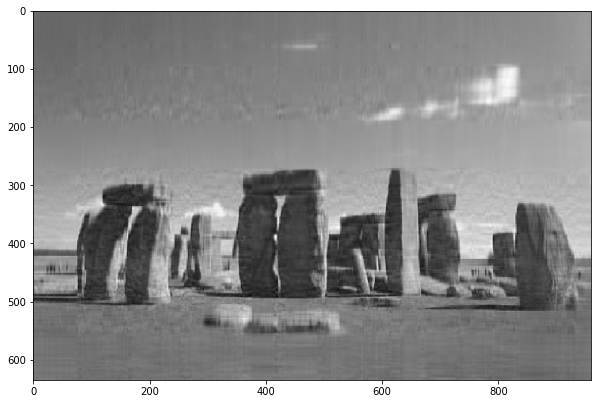

In [86]:
# 6) Rank-K A^i 시각화, k의 한계는 min (w,h) 이다.
k=30
im = imtemp(k)
m,n = np.shape(imMatrix)
partial, total = k*(m+n)+k, m*n
partial, total, partial/total
plt.imshow(im, cmap='gray')
plt.show()